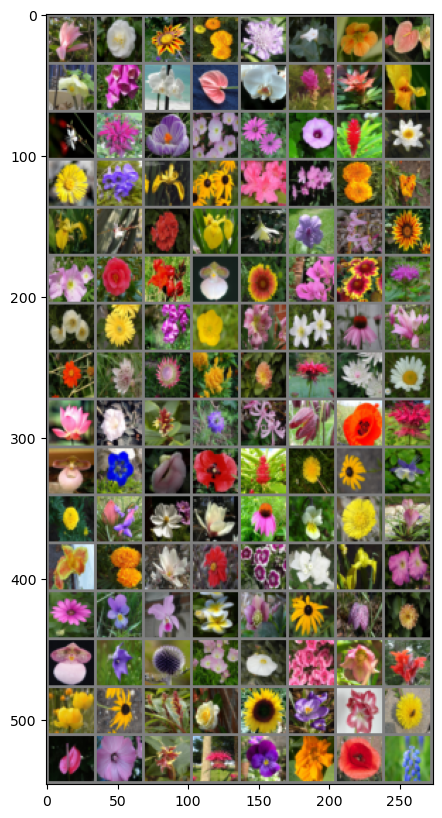

In [1]:
import torchvision
import torchvision.transforms as transforms
import numpy as np
from utils import get_dataset, imshow
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 10)

IMG_SIZE = 32
BATCH_SIZE = 128

data_transforms = [
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # Scales data into [0,1]
    transforms.Lambda(lambda t: (t * 2) - 1) # Scale between [-1, 1]
]

trainloader, testloader = get_dataset(dataset_name='flowers102', transform=data_transforms, batchsize = BATCH_SIZE)
imshow(testloader)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module): # Image: [32, 32, 3] ---> Category: [102]
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 120)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# testing
input = torch.rand([1,3,IMG_SIZE,IMG_SIZE])
out = net(input)
print("input shape:", input.shape)
print("output shape:", out.shape)


input shape: torch.Size([1, 3, 32, 32])
output shape: torch.Size([1, 120])


Device: cuda
######### Starting Training ########
it:0/2, Average Accuracy: 0.009036578238010406
it:1/2, Average Accuracy: 0.006696428571428571
######### Finished Training ########
Total Trainig Time[s]:  4.186163902282715 
Average Training Time per Epoch [it/s]:  2.0930819511413574 
Device: cuda


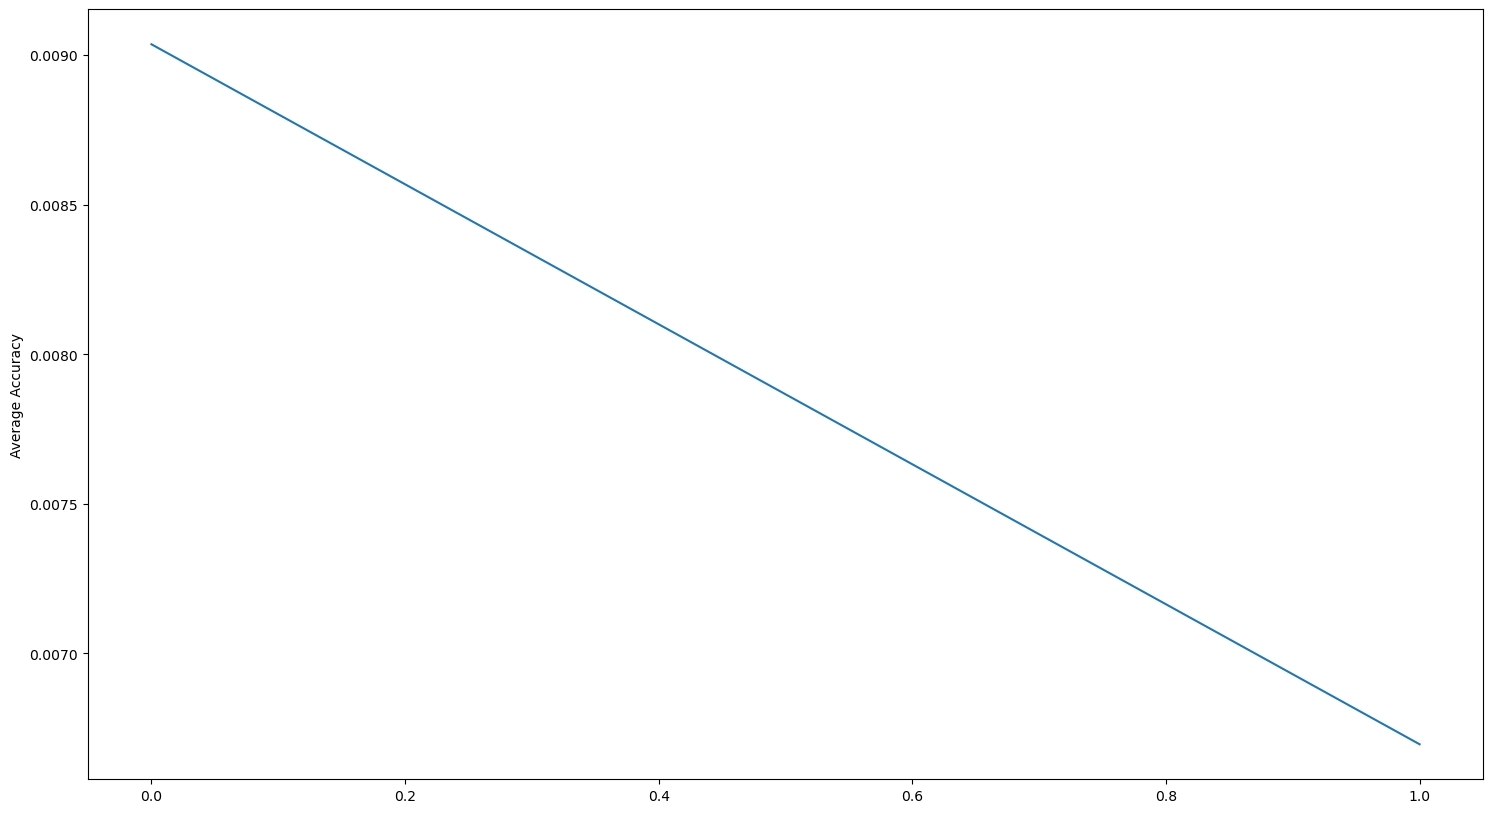

In [3]:
import torch.optim as optim
from utils import train

trained_net = train(net, 
                    epochs=2, 
                    trainloader = trainloader, 
                    criterion = nn.CrossEntropyLoss(), 
                    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9),
                    device='cuda')